In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os,fnmatch
import seaborn as sns; sns.set()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
%matplotlib inline
print(tf.__version__)

2.12.0


In [34]:
!wget http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz

--2023-07-07 09:14:12--  http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz
Resolving peipa.essex.ac.uk (peipa.essex.ac.uk)... 155.245.93.3
Connecting to peipa.essex.ac.uk (peipa.essex.ac.uk)|155.245.93.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111154265 (106M) [application/gzip]
Saving to: ‘all-mias.tar.gz’

all-mias.tar.gz     100%[===================>] 106.00M  10.4MB/s    in 12s     

2023-07-07 09:14:26 (8.71 MB/s) - ‘all-mias.tar.gz’ saved [111154265/111154265]



In [35]:
!wget https://mynotebook.labarchives.com/attachments/My45MDAwMDAwMDAwMDAwMDA0fDg1NzYylzMvRW50cnlQYXJ0LQxNTk4ODc0Nzh8OS44OTk5OTk5OTk5OTk5OTk5OTk=/1/original?sf324=343

--2023-07-07 09:14:33--  https://mynotebook.labarchives.com/attachments/My45MDAwMDAwMDAwMDAwMDA0fDg1NzYylzMvRW50cnlQYXJ0LQxNTk4ODc0Nzh8OS44OTk5OTk5OTk5OTk5OTk5OTk=/1/original?sf324=343
Resolving mynotebook.labarchives.com (mynotebook.labarchives.com)... 54.235.213.76, 184.73.154.101
Connecting to mynotebook.labarchives.com (mynotebook.labarchives.com)|54.235.213.76|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mynotebook.labarchives.com/login [following]
--2023-07-07 09:14:34--  https://mynotebook.labarchives.com/login
Reusing existing connection to mynotebook.labarchives.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 33007 (32K) [text/html]
Saving to: ‘original?sf324=343’

original?sf324=343  100%[===================>]  32.23K   174KB/s    in 0.2s    

2023-07-07 09:14:34 (174 KB/s) - ‘original?sf324=343’ saved [33007/33007]



In [36]:
!mkdir Images
!tar -C Images -zxvf all-mias.tar.gz

Info.txt
Licence.txt
README
mdb001.pgm
mdb002.pgm
mdb003.pgm
mdb004.pgm
mdb005.pgm
mdb006.pgm
mdb007.pgm
mdb008.pgm
mdb009.pgm
mdb010.pgm
mdb011.pgm
mdb012.pgm
mdb013.pgm
mdb014.pgm
mdb015.pgm
mdb016.pgm
mdb017.pgm
mdb018.pgm
mdb019.pgm
mdb020.pgm
mdb021.pgm
mdb022.pgm
mdb023.pgm
mdb024.pgm
mdb025.pgm
mdb026.pgm
mdb027.pgm
mdb028.pgm
mdb029.pgm
mdb030.pgm
mdb031.pgm
mdb032.pgm
mdb033.pgm
mdb034.pgm
mdb035.pgm
mdb036.pgm
mdb037.pgm
mdb038.pgm
mdb039.pgm
mdb040.pgm
mdb041.pgm
mdb042.pgm
mdb043.pgm
mdb044.pgm
mdb045.pgm
mdb046.pgm
mdb047.pgm
mdb048.pgm
mdb049.pgm
mdb050.pgm
mdb051.pgm
mdb052.pgm
mdb053.pgm
mdb054.pgm
mdb055.pgm
mdb056.pgm
mdb057.pgm
mdb058.pgm
mdb059.pgm
mdb060.pgm
mdb061.pgm
mdb062.pgm
mdb063.pgm
mdb064.pgm
mdb065.pgm
mdb066.pgm
mdb067.pgm
mdb068.pgm
mdb069.pgm
mdb070.pgm
mdb071.pgm
mdb072.pgm
mdb073.pgm
mdb074.pgm
mdb075.pgm
mdb076.pgm
mdb077.pgm
mdb078.pgm
mdb079.pgm
mdb080.pgm
mdb081.pgm
mdb082.pgm
mdb083.pgm
mdb084.pgm
mdb085.pgm
mdb086.pgm
mdb087.pgm
mdb088.pgm
mdb0

In [37]:
def load_data():

  files=os.listdir("Images")
  files.remove("Info.txt")
  files.remove("Licence.txt")
  files.remove("README")

  os.mkdir("Images/train")
  os.mkdir("Images/test")

  for i in range(len(files)):
    x=cv2.imread("Images/"+files[i])
    if(i<round(0.6*len(files))):
      cv2.imwrite("Images/train/"+str(i)+".png",x)
    else:
      cv2.imwrite("Images/test/"+str(i)+".png",x)

load_data()


In [68]:
class DataGen:
  def __init__(self,path,batch_size,target_size):
    self.path=path
    self.batch_size=batch_size
    self.target_size=target_size

  def getImage(self,imPath):
    img=cv2.imread(imPath,0)
    return img

  def rescale(self,img):
    x=img/255.0
    return x

  def resize(self,img):
    x=cv2.resize(img,self.target_size,interpolation=cv2.INTER_CUBIC)
    x=np.reshape(x,(64,64,1))
    return x

  def addNoise(self,img,noise_factor,mu=0,sigma=1):
    img+=noise_factor*np.random.normal(mu,sigma,size=img.shape)
    img=np.clip(img,0.,1.)
    return img

  def poission_noise(self,img):
    img+= np.random.poisson(img).astype(float)
    img=np.clip(img,0.,1.)
    return img

  def generate(self):
    import os

    files=os.listdir(self.path)
    while(True):
      batch_paths=np.random.choice(a=files,size=self.batch_size)
      batch_input=[]
      batch_output=[]

      for input_path in batch_paths:
        img=self.getImage(self.path+input_path)
        img=self.rescale(img)
        img=img.astype(np.float)
        output=self.resize(img)
        img=self.addNoise(img,0.1)
        img=self.resize(img)
        batch_input+=[img]
        batch_output+=[output]
      batch_x=np.array(batch_input)
      batch_y=np.array(batch_output)

      yield batch_x,batch_y

In [69]:
train=DataGen("Images/train/",16,(64,64))

In [70]:
train_gen=train.generate()

In [71]:
test=DataGen("Images/test/",10,(64,64))

In [72]:
test_gen=test.generate()

In [73]:
import tensorflow as tf
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('loss')<0.23 and logs.get('val_loss')<0.23:
      print("\n Stopping training......\n")
      self.model.stop_training=True

In [74]:
mycallback=callback()

In [75]:
autoencoder =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(64,64,1),activation="relu",padding="same",data_format="channels_last"),
    tf.keras.layers.MaxPool2D(padding="same"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(padding="same"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    tf.keras.layers.UpSampling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    tf.keras.layers.UpSampling2D(),
    tf.keras.layers.Conv2D(1,(3,3),activation="sigmoid",padding="same"),
])

In [76]:
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 up_sampling2d_8 (UpSampling  (None, 32, 32, 64)      

In [77]:
autoencoder.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [78]:
hist=autoencoder.fit_generator(train_gen,epochs=10,steps_per_epoch=16,validation_data=test_gen,validation_steps=10,callbacks=[mycallback])

<ipython-input-78-de3eb03ff7c7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=autoencoder.fit_generator(train_gen,epochs=10,steps_per_epoch=16,validation_data=test_gen,validation_steps=10,callbacks=[mycallback])
<ipython-input-68-e137fc1950e9>:42: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img=img.astype(np.float)


Epoch 1/10
16/16 [==============================] - 33s 2s/step - loss: 0.4643 - accuracy: 0.4778 - val_loss: 0.2865 - val_accuracy: 0.4776
Epoch 2/10
16/16 [==============================] - 33s 2s/step - loss: 0.2796 - accuracy: 0.4718 - val_loss: 0.2743 - val_accuracy: 0.4687
Epoch 3/10
16/16 [==============================] - 34s 2s/step - loss: 0.2718 - accuracy: 0.4656 - val_loss: 0.2568 - val_accuracy: 0.4905
Epoch 4/10
16/16 [==============================] - 33s 2s/step - loss: 0.2538 - accuracy: 0.4840 - val_loss: 0.2640 - val_accuracy: 0.4601
Epoch 5/10
16/16 [==============================] - 32s 2s/step - loss: 0.2552 - accuracy: 0.4753 - val_loss: 0.2549 - val_accuracy: 0.4760
Epoch 6/10
16/16 [==============================] - 31s 2s/step - loss: 0.2465 - accuracy: 0.4841 - val_loss: 0.2568 - val_accuracy: 0.4721
Epoch 7/10
16/16 [==============================] - 33s 2s/step - loss: 0.2526 - accuracy: 0.4707 - val_loss: 0.2560 - val_accuracy: 0.4658
Epoch 8/10
16/16 [==

In [79]:
from mpl_toolkits.axes_grid1 import ImageGrid

In [80]:
r,t=next(test_gen)

<ipython-input-68-e137fc1950e9>:42: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img=img.astype(np.float)


In [81]:
z=autoencoder.predict(r)

1/1 [==============================] - 0s 207ms/step


In [82]:
z.shape

(10, 64, 64, 1)

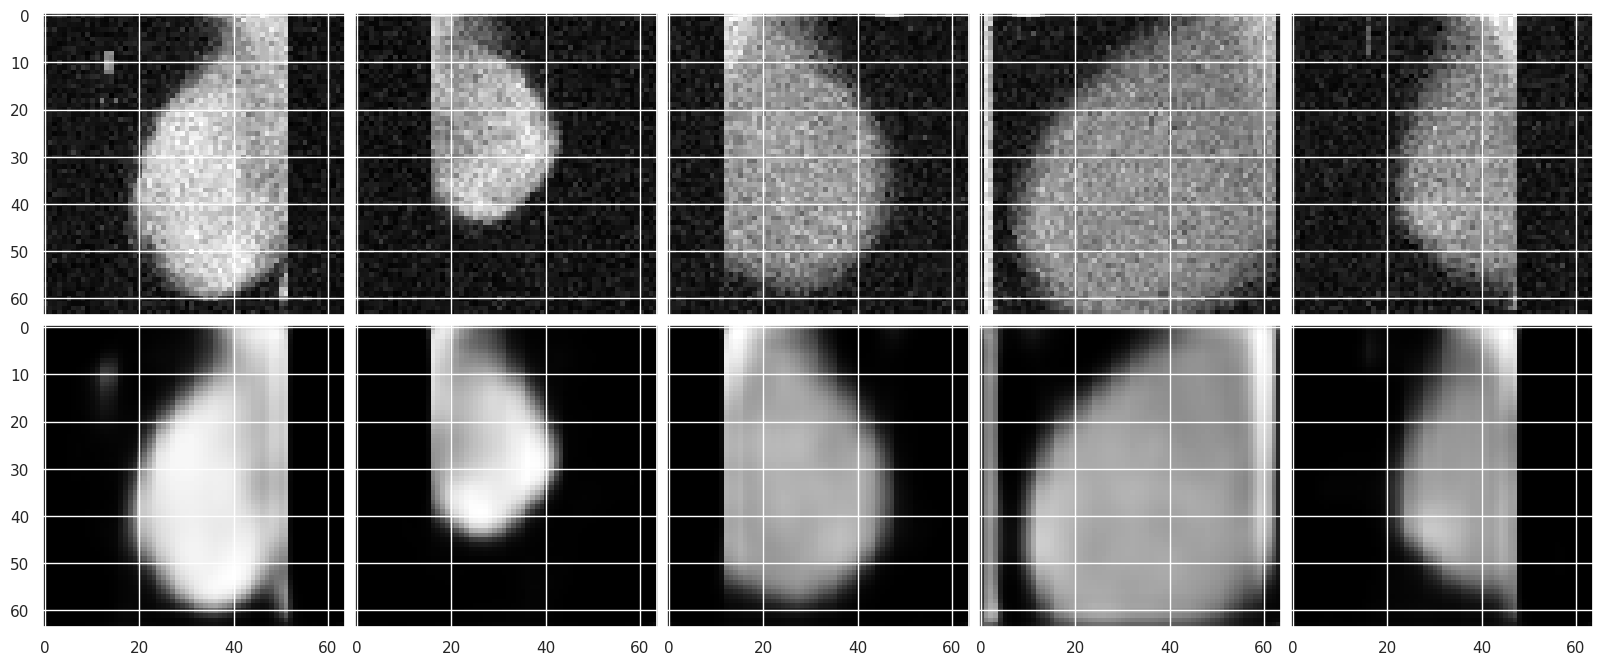

In [83]:
img1=r[0][:,:,0]
img2=r[1][:,:,0]
img3=r[2][:,:,0]
img4=r[3][:,:,0]
img5=r[4][:,:,0]

den_img1=z[0][:,:,0]*255.
den_img2=z[1][:,:,0]*255.
den_img3=z[2][:,:,0]*255.
den_img4=z[3][:,:,0]*255.
den_img5=z[4][:,:,0]*255.

fig=plt.figure(figsize=(20.,10.))
grid=ImageGrid(fig,111,nrows_ncols=(2,5),axes_pad=0.1,)

for ax,im in zip(grid,[img1,img2,img3,img4,img5,den_img1,den_img2,den_img3,den_img4,den_img5]):
  ax.imshow(im,cmap="gray")

plt.show()
